<a href="https://colab.research.google.com/github/fkonrad97/Network/blob/main/Kriukov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import random
import math
import numpy as np
import random
import matplotlib.pyplot as plt

In [168]:
def hyperbolicDist(coord1, coord2):
  x1 = coord1[0]
  y1 = coord1[1]
  x2 = coord2[0]
  y2 = coord2[1]

  return np.arccosh(np.cosh(y1)*np.cosh(x2-x1)*np.cosh(y2)-np.sinh(y1)*np.sinh(y2))

In [178]:
# https://meyavuz.wordpress.com/2018/11/15/generate-uniform-random-points-within-a-circle/

class Network:
    def __init__(self, inputRadius):
      self.inputRadius = inputRadius
      self.xCoordinate = []
      self.yCoordinate = []
      self.coordinates = []
      self.edges = []

    def add_edge(self, src, dest):
      edge = [src, dest]
      self.edges.append(edge)

    def growNetwork(self):
      for i in range(len(self.coordinates)):
        for j in range(len(self.coordinates)):
          if self.coordinates[i] != self.coordinates[j]:
            dist = hyperbolicDist(self.coordinates[i],self.coordinates[j])
            if dist < self.inputRadius:
              self.add_edge(i,j)

    def generatePoint(self):
      radius = self.inputRadius * math.sqrt(random.random())
      theta = 2 * math.pi * random.random()

      return radius * math.cos(theta), radius * math.sin(theta)

    def createNodes(self, n):
      self.xCoordinate, self.yCoordinate =  [], []
      for i in range(n):
          xc, yc = self.generatePoint()
          self.xCoordinate.append(xc)
          self.yCoordinate.append(yc)
      self.convertCoords(n)

    def convertCoords(self, n):
        for i in range(n):
           self.coordinates.append([self.xCoordinate[i], self.yCoordinate[i]])

    def plot(self):
        plt.figure(1)
        plt.plot(self.xCoordinate, self.yCoordinate,'b.')
        plt.grid('on')

        x_circle = [self.inputRadius*math.cos(i) for i in np.arange(0, math.pi*2, 0.01)]
        y_circle = [self.inputRadius*math.sin(i) for i in np.arange(0, math.pi*2, 0.01)]
        plt.plot(x_circle, y_circle, '-k')

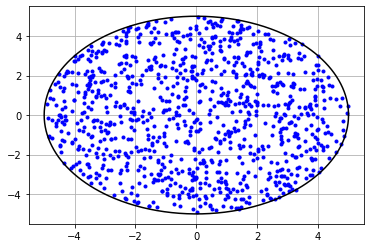

In [183]:
network = Network(5)

network.createNodes(1000)
network.growNetwork()
network.plot()